___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

In [13]:
#lendo a planilha de dados
sptdata = pd.read_csv("data.csv")

#ajustando a quantidade de termos que precisamos usar
spotdata = sptdata[0:100]
spotdatatreina = sptdata[100:200]

Dicionário dos dados:
https://developer.spotify.com/web-api/get-audio-features/

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8:

Frequências relativas por notas musicais:
C         10.0
C♯, D♭    16.0
D         13.0
D♯, E♭     2.0
E          3.0
F          8.0
F♯, G♭     5.0
G          9.0
G♯, A♭     5.0
A         10.0
A♯, B♭    10.0
B          9.0
Name: key, dtype: float64 



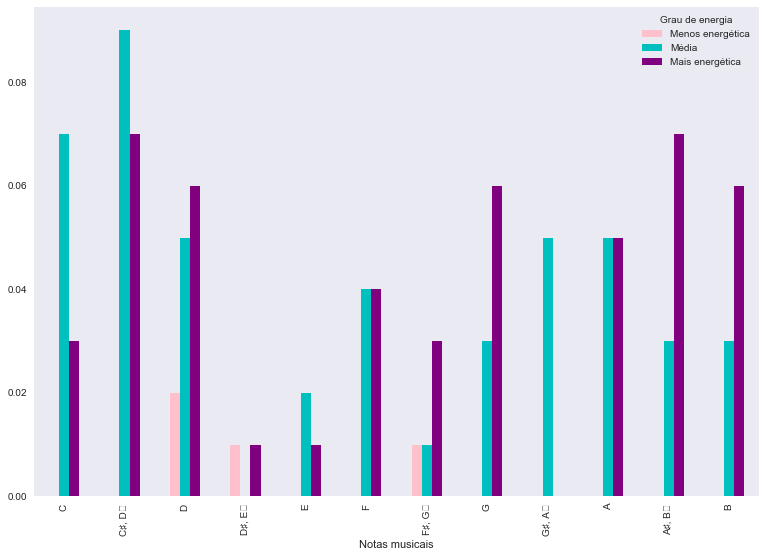

In [14]:
spotdata.notakey = spotdata.key
spotdata.notakey = spotdata.notakey.astype('category')
spotdata.notakey.cat.categories = (['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B'])

#filtrando/dividindo os Estados por Regiões:
spotdata.energyy = spotdata.energy
spotdata.energyy[(spotdata.energyy >= 0) & (spotdata.energyy < 0.33)] = [0]
spotdata.energyy[(spotdata.energyy >= 0.33) & (spotdata.energyy < 0.66)] = [1]
spotdata.energyy[(spotdata.energyy >= 0.66) & (spotdata.energyy < 1)] = [2]
spotdata.energyy = spotdata.energyy.astype('category')
spotdata.energyy.cat.categories = (['Menos energética','Média','Mais energética'])

print('Frequências relativas por notas musicais:')
ut1 = (spotdata.notakey.value_counts(normalize=True)*100).round(decimals=1).reindex(['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B'])
print(ut1,'\n')

#tabela de frequência das notas (key)
NotaEnergy = pd.crosstab(spotdata.notakey,spotdata.energyy, normalize=True, colnames=['Grau de energia'],rownames=['Notas musicais'])
NotaEnergy.plot(kind = 'bar',title = '',figsize=(13,9),color = ('pink','c','purple'),grid=False)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

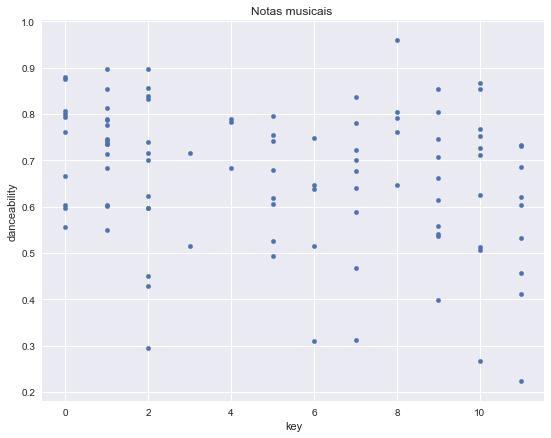

Grau de energia,0,1,2,3,4,5,6,7,8,9,10,11,All
Notas musicais,,,,,,,,,,,,,
0,0.02,0.05,0.01,0.01,0.03,0.06,0.01,0.01,0.01,0.05,0.07,0.07,0.4
1,0.08,0.11,0.12,0.01,0.00,0.02,0.04,0.08,0.04,0.05,0.03,0.02,0.6
All,0.10,0.16,0.13,0.02,0.03,0.08,0.05,0.09,0.05,0.10,0.10,0.09,1.0


In [33]:
#para o treinamento do computador dos 100 primeiros termos
spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']
# for i in spotdata['mode12key']:
#     if i>=12:
#         print('tom maior')
#         if 
spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)

#para o teste dos novos termos de 100 a 200
spotdata['mode12keytreina'] = spotdatatreina['mode']*12 + spotdatatreina['key']
spotdata['mode12keytreina'] = np.where(spotdata.mode12keytreina >= spotdata['mode12keytreina'].mean(), 1, 0)

#plot do gráfico 
spotdata.plot(kind = "scatter", x = "key", y = "danceability",figsize=(9,7))
plt.title('Notas musicais ')
plt.show()

pd.crosstab(spotdata['mode'],spotdata.key,margins=True,normalize=True, colnames=['Grau de energia'],rownames=['Notas musicais'])

## **Part 2:** Predicting a Categorical Response

In [16]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['danceability']
X = spotdata[feature_cols]
y = spotdata.mode12key
logreg.fit(X, y)
spotdata['mode12key_pred_class'] = logreg.predict(X)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:

pd.crosstab(spotdata.notakey,spotdata['danceability'], colnames=['Notas musicais'])
spotdata['danceability'].describe()

count    100.00000
mean       0.66918
std        0.15105
min        0.22400
25%        0.59675
50%        0.70300
75%        0.78125
max        0.95900
Name: danceability, dtype: float64

In [18]:
spotdata['mode12key_pred_prob'] = logreg.predict_proba(X)[:, 1]

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


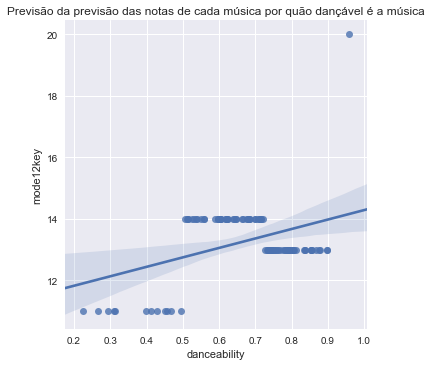

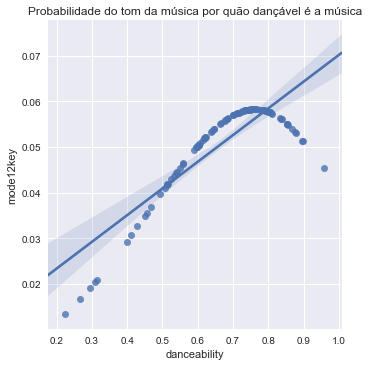

In [19]:
sns.lmplot('danceability','mode12key_pred_class',spotdata)
plt.title('Previsão da previsão das notas de cada música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

sns.lmplot(x = 'danceability', y='mode12key_pred_prob', data=spotdata)
plt.title('Probabilidade do tom da música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

O gráfico de probabilidade nos diz que, para uma dançabilidade menor, a chance de a música ter um tom menor e ter as notas iniciais (mais próximas de dó (key 0 = C)) é maior que a outra chance.

In [20]:
# examine some example predictions

print(logreg.predict_proba(0.2))
print(logreg.predict_proba(0.5))
print(logreg.predict_proba(0.8))

[[  2.01388127e-03   1.19786620e-02   1.71131474e-02   4.17435925e-02
    1.28686366e-03   3.55458739e-02   1.96518104e-01   2.53306384e-03
    8.14198121e-03   8.42635887e-02   2.39452697e-02   2.69545980e-01
    6.35949021e-03   4.23182577e-03   6.91133306e-02   1.60430042e-03
    2.54818266e-02   3.82958716e-02   8.63081693e-02   5.83915978e-06
    1.69591077e-02   5.51680172e-02   1.84221350e-03]]
[[ 0.01122874  0.04033273  0.01570524  0.01828279  0.01160466  0.06799429
   0.00700031  0.00822436  0.01262909  0.07926782  0.06485707  0.13799715
   0.04129069  0.04212853  0.13464824  0.00682626  0.02905534  0.05333768
   0.11134533  0.00096589  0.04615359  0.04831883  0.01080537]]
[[  2.65735402e-02   5.77492086e-02   6.12079514e-03   3.26023188e-03
    4.36975544e-02   5.57900108e-02   6.76457938e-05   1.14411621e-02
    8.39786096e-03   3.02642760e-02   7.50463720e-02   1.89045816e-02
    1.08947062e-01   1.60981238e-01   1.12509622e-01   1.24219799e-02
    1.40711081e-02   3.161003

A primeira coluna 